In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [10]:
# Load the stock price data (replace this with your own data)
# Example data: Apple Inc. (AAPL) historical stock prices
data = pd.read_csv('C:\\Users\\hp\\Downloads\\AAPL.csv')
prices = data['Close'].values.reshape(-1, 1)

In [11]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
prices_normalized = scaler.fit_transform(prices)


In [12]:
# Split the data into training and testing sets
train_size = int(len(prices_normalized) * 0.8)
train_data = prices_normalized[:train_size]
test_data = prices_normalized[train_size:]

In [13]:
# Create sequences for training
sequence_length = 30  # Number of time steps to look back
X_train, y_train = [], []


In [14]:
for i in range(len(train_data) - sequence_length):
    X_train.append(train_data[i:i+sequence_length])
    y_train.append(train_data[i+sequence_length])

In [15]:
X_train, y_train = np.array(X_train), np.array(y_train)


In [16]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [17]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
6/6 [==============================] - 6s 36ms/step - loss: 0.0783
Epoch 2/10
6/6 [==============================] - 0s 34ms/step - loss: 0.0277
Epoch 3/10
6/6 [==============================] - 0s 35ms/step - loss: 0.0104
Epoch 4/10
6/6 [==============================] - 0s 33ms/step - loss: 0.0159
Epoch 5/10
6/6 [==============================] - 0s 33ms/step - loss: 0.0090
Epoch 6/10
6/6 [==============================] - 0s 32ms/step - loss: 0.0094
Epoch 7/10
6/6 [==============================] - 0s 35ms/step - loss: 0.0077
Epoch 8/10
6/6 [==============================] - 0s 35ms/step - loss: 0.0074
Epoch 9/10
6/6 [==============================] - 0s 31ms/step - loss: 0.0065
Epoch 10/10
6/6 [==============================] - 0s 39ms/step - loss: 0.0062


In [19]:
# Create sequences for testing
X_test, y_test = [], []

for i in range(len(test_data) - sequence_length):
    X_test.append(test_data[i:i+sequence_length])
    y_test.append(test_data[i+sequence_length])

X_test, y_test = np.array(X_test), np.array(y_test)


In [20]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

1/1 [==============================] - 1s 1s/step


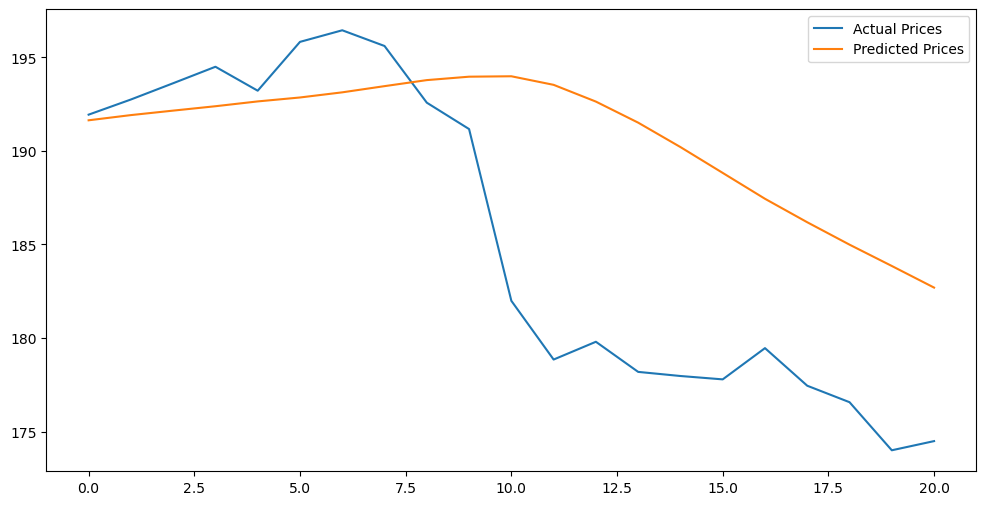

In [23]:
# Plot the actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(prices[train_size + sequence_length:], label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.legend()
plt.show()